In [1]:
from utils.config_loader import load_config, assign_config
from processing.preprocessing import preprocess_data
from processing.normalize import normalize_data
from processing.labelizer import get_labels
from processing.train_splitter import split_data
from model.train import train_model
from model.inference import infer
from model.metrics import calculate_rmse
from visualization.plots import plot_heatmaps

config = load_config()

Login to wandb and init experiment

In [2]:
import wandb
import os

os.environ['WANDB_NOTEBOOK_NAME'] = "pipeline.ipynb"
wandb.login()

run = wandb.init(
    project="WindViVit",
    
    notes="LinearLR with warmup correctly implemented",
    tags=["8 years data", "LinearLR", "BERT"]
)

wandb: Currently logged in as: samuelreyes. Use `wandb login --relogin` to force relogin


Assign config to wandb experiment

In [3]:

wandb_config = wandb.config

assign_config(wandb_config, config)

### Data preprocessing

In [ ]:
preprocess_data(config)

In [ ]:
normalize_data(config)

In [ ]:
get_labels(config)

In [ ]:
split_data(config)

### Training

In [4]:
train_model(config)

Epoch [0.5/30], Val Loss: 0.7293535620880901
Epoch [1/30], Loss: 0.1402730792760849, Val Loss: 0.30471332963654285
Epoch [1.5/30], Val Loss: 0.2648386468631017
Epoch [2/30], Loss: 0.0802723839879036, Val Loss: 0.19021369627550336
Epoch [2.5/30], Val Loss: 0.2666265592130154
Epoch [3/30], Loss: 0.06691768765449524, Val Loss: 0.17533318458113661
Epoch [3.5/30], Val Loss: 0.1854795911264347
Epoch [4/30], Loss: 0.05635231360793114, Val Loss: 0.14525084358471885
Epoch [4.5/30], Val Loss: 0.17490583421326192
Epoch [5/30], Loss: 0.05224575102329254, Val Loss: 0.1288599467498173
Epoch [5.5/30], Val Loss: 0.15742731352788197
Epoch [6/30], Loss: 0.05224261060357094, Val Loss: 0.12061638483668075
Epoch [6.5/30], Val Loss: 0.14157261136866364
Epoch [7/30], Loss: 0.04983898624777794, Val Loss: 0.11501916235739755
Epoch [7.5/30], Val Loss: 0.1380374809730851
Epoch [8/30], Loss: 0.04860970005393028, Val Loss: 0.1135912876855771
Epoch [8.5/30], Val Loss: 0.1359024249984454
Epoch [9/30], Loss: 0.049519

KeyboardInterrupt: 

### Evaluate model

In [5]:
results = infer(config)

In [6]:
rmse = calculate_rmse(results)
wandb.log({"rmse": rmse})
rmse

0.25610605

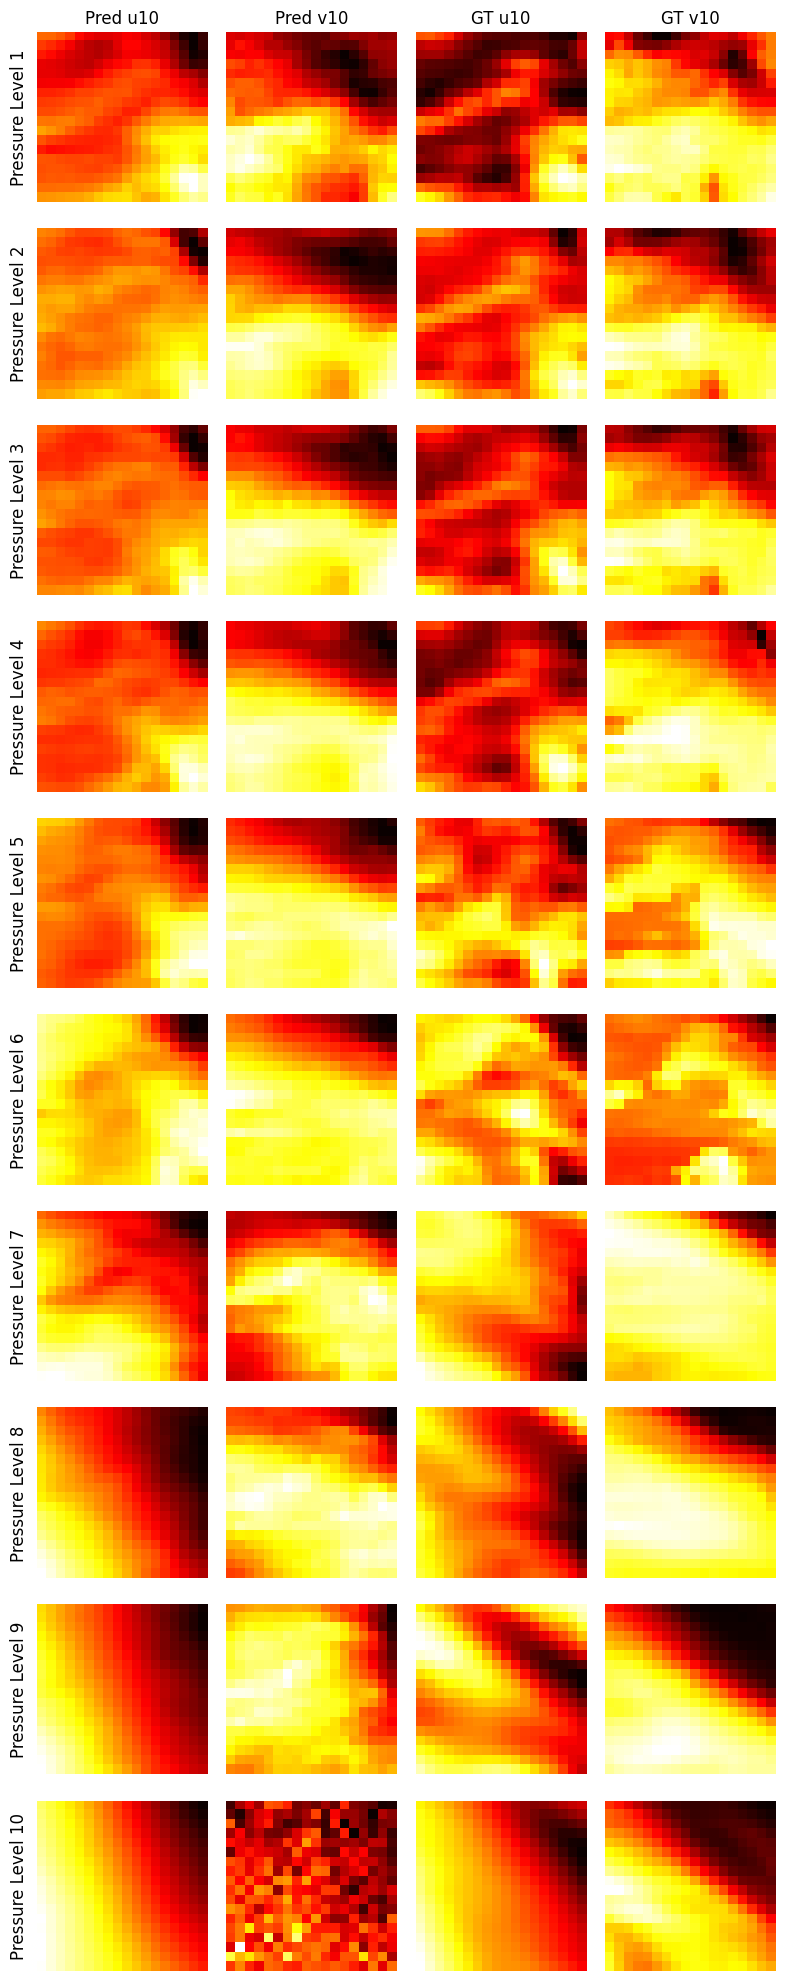

<Figure size 640x480 with 0 Axes>

In [11]:
fig = plot_heatmaps(config, results, 1500, 5)

In [8]:
wandb.log({"heatmap": fig})

In [9]:
run.finish()

Epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
LR,▁▆████▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂
Step,▃▆▂▆▂▆▂▅▃▇▃▇▃▆▃▆▄█▄█▄▇▄▇▅▁▅▁▅▁▅█▆▂▆▂▆▂▅▃
Train loss,█▄▄▃▃▃▂▂▂▂▂▂▂▂▁▁▁▁▁▁
Val loss,█▄▃▂▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
rmse,▁
Epoch,20
LR,0.00033
Step,1500
Train loss,0.02595
Val loss,0.06525
